<a href="https://colab.research.google.com/github/lorduwahz/Data-Science/blob/main/Francis_Euston_%5BTGB_6_Month_Fellowship%5D_SLR_and_MLR_Algorithms_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression (SLR and MLR Algorithms)

### The problem 

Welcome to Machine Learning Housing Corporation! The task is to build a model of housing prices in California using the California census data. 

This data has metrics such as the population, median income, median housing price, and so on for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a blockgroup typically has a population of 600 to 3,000 people). We will call them “districts” for short.

The task is to build a model that can predict the median value of a house based on the test data provided with at least 60% score on evaluation for an "acceptable" performance.

### Data

The below url is loaded directly via the `pd.read_csv()` function. 
https://raw.githubusercontent.com/Port-Harcourt-School-Of-AI/Practical-Machine-Learning-Course-2020/master/Carlifonia%20Housing%20Data%20Set%20(Open).csv



In [291]:
# Unix comand to list all the files in the sample_data folder
!ls sample_data/

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [292]:
# Import the necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [293]:
# Load in the data set with pandas and read the first few rows
data = pd.read_csv('https://raw.githubusercontent.com/Port-Harcourt-School-Of-AI/Practical-Machine-Learning-Course-2020/master/Carlifonia%20Housing%20Data%20Set%20(Open).csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


You will noticed from the data, that 'median', `total_rooms` are with numbers that are quite large. This is because they are not for an inidividual house, but a block of houses. Remember from the begining that a block group typically has a population of 600 to 3,000 people and are called “districts” for short.

> This question might come to mind, why is the `median_income` that low? It is because they are expressed in $10,000. 
Meaning 8.3252 (first value in the `median_income` column) is 8.3252 * 10,000 = $83,252

> The `median_house_value` column is the target variable, we are trying to predict.

> There is also a categorical feature under the `ocean_proximity` column we will have to deal with later on.


In [294]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Checking each of your features from the output by calling `.info()` on the data above, it is clear that all the columns do not correspond to the same number of "Non-null Count". 

In [295]:
## Check for missing/null values
data.isnull().values.any()

True

Using the above code on our data to helps to check if any values in the data are null (meaning if they are missing). It always returns a boolean values of either `True` or `False`. 

**TASK:** Are there null values? We have to drop them by calling the `.dropna()`

The function of the `.dropna()` function is to drop all rows containing null values. 

In [296]:
# Print the shape of the data before dropping null values
data.shape

(20640, 10)

In [297]:
#Drop null values from the data
data.dropna(axis=0, how='any', inplace=True)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [298]:
# Print the shape of our data after dropping null values
data.shape

(20433, 10)

In [299]:
# Describe your data (It will only output statistics on our numerical features only)
data.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We have taken a look at the numerical features available, now lets take a look at the categorical features in the data. What are the different categories in this feature?

In [300]:
# Call the unique() method on the categorical feature
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

`NEAR BAY` means means the houses (block group) are located near the bay area in california.

`<1H OCEAN` means the houses (block group) are located less than one hour to the ocean.

`NEAR OCEAN` means the houses (block group) are located near the ocean.

`ISLAND` means the houses (block group) are located on the island.

## Explore Relationships in the Data

In [301]:
## Checking for a correlation
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


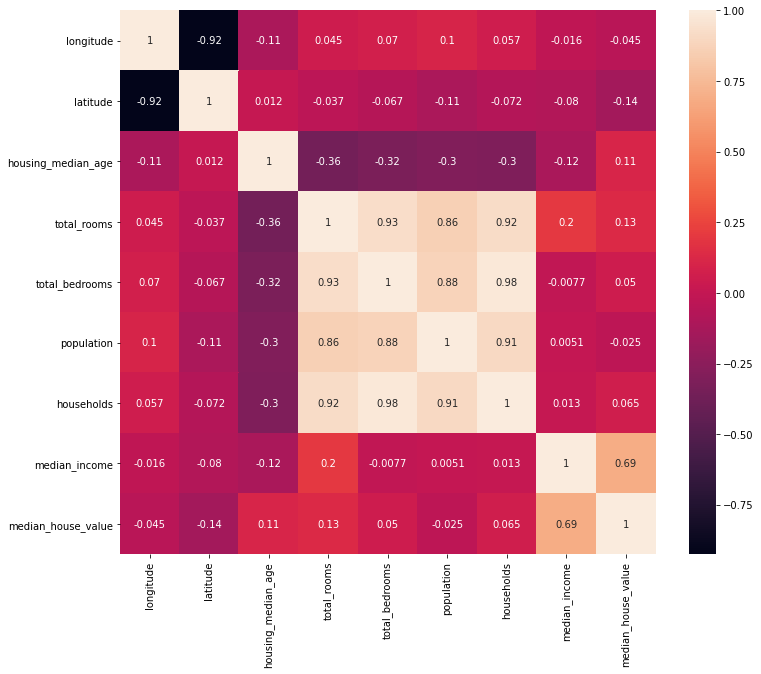

In [302]:
# Visualize the correlation
fig, ax = plt.subplots(figsize=(12, 10))
sn.heatmap(data.corr(), annot=True)

My observation from the heatmap are:
1. The Median House value is fairly affected by the median income of that area/region.
2.  It is obvious that highly populated areas have high number of households and this strongly affects the number of bedrooms and total rooms of houses in those areas

In [303]:
# Check for the available columns again.
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

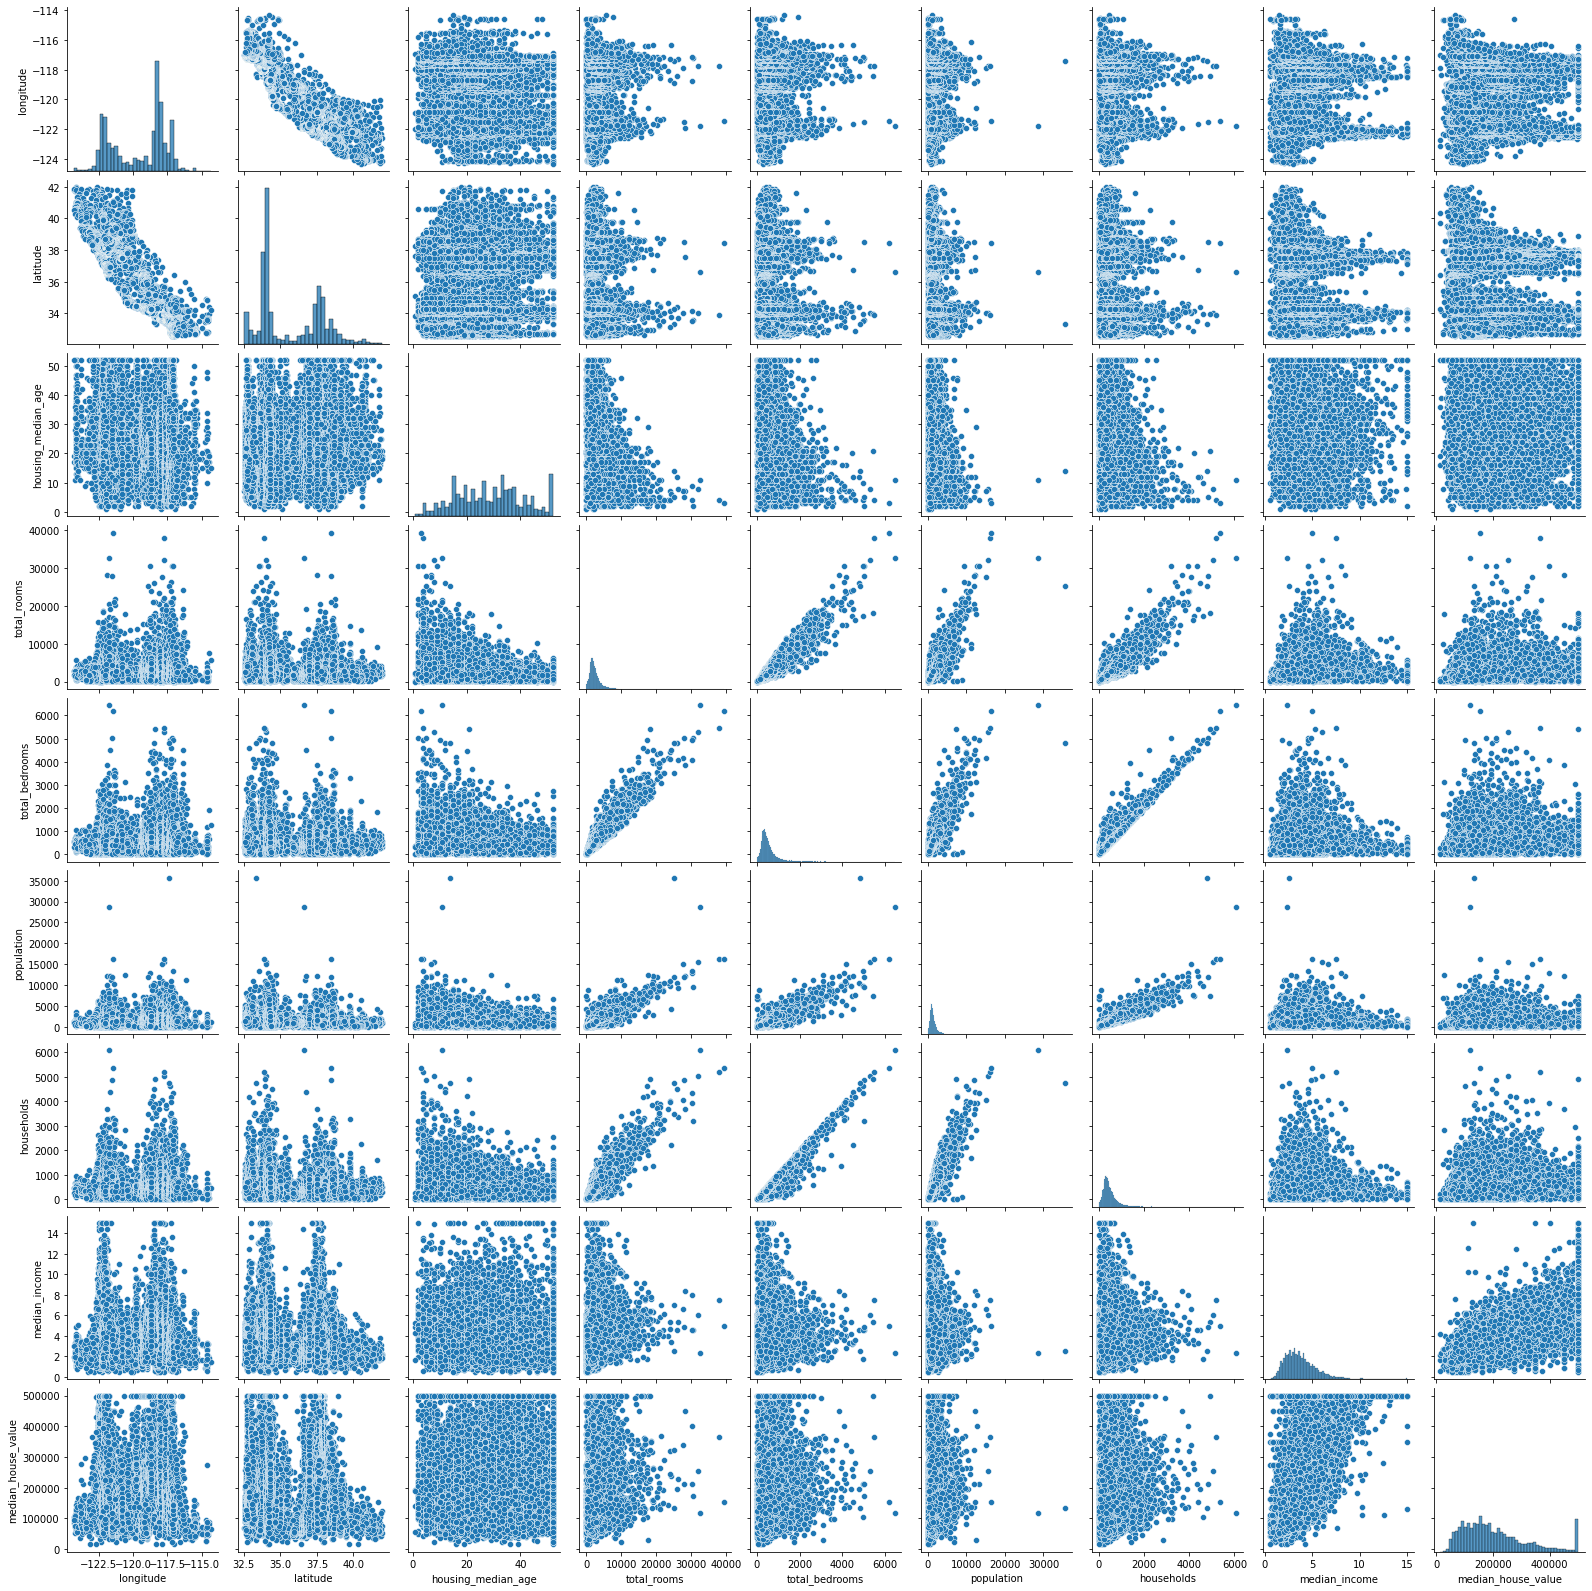

In [304]:
## A pair-plot for all our numeric features

sn.pairplot(data)
plt.show()


From the above plot, there seems to be a positive correlation between `median_income` (explanatory variable) and `median_house_value` (response variable).

There is also a strong correlation between `total_rooms`, `total_bedrooms` and the `median_house_value`. 

We will take a closer look by plotting them on individual plots.


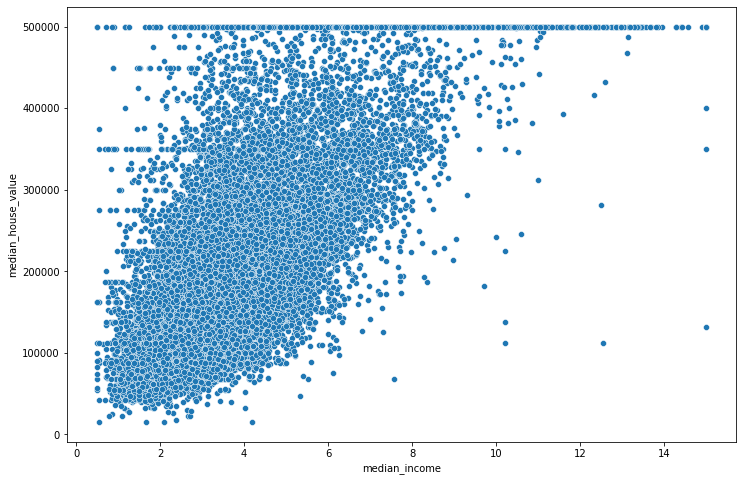

In [305]:
## Plot a scatter graph to find the correlation between median_income and median_house_value

fig, ax = plt.subplots(figsize=(12, 8))
sn.scatterplot(x=data['median_income'], y=data['median_house_value'], legend='auto')


That looks like an upward trend and hence a positive correlation. What does this correlation mean? This means an increase in the `median_income` will lead to an increase in `median_house_value`.

We can also spot some values that have been capped at some certain prices.

Are these capped values a threat to the potency of our model? Remember ML algorithms are good at recognizing and memorizing patterns and relationship in data.

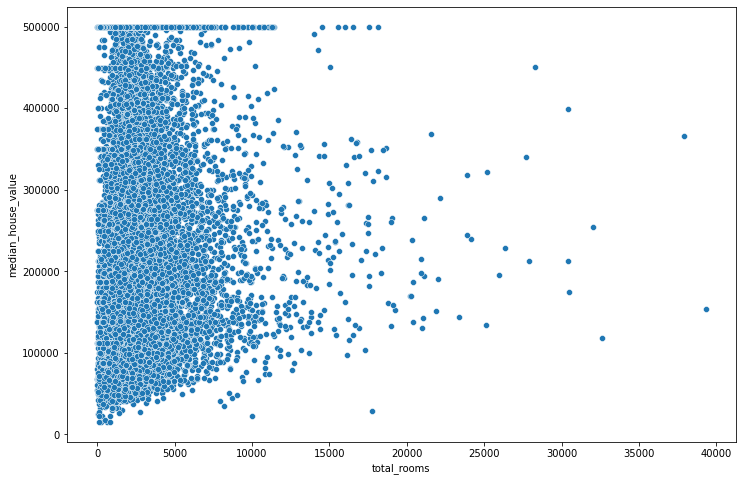

In [306]:
# Plot a scatter graph to find the correlation between total_rooms and median_house_value
fig, ax = plt.subplots(figsize=(12, 8))
sn.scatterplot(x=data['total_rooms'], y=data['median_house_value'], legend='auto')

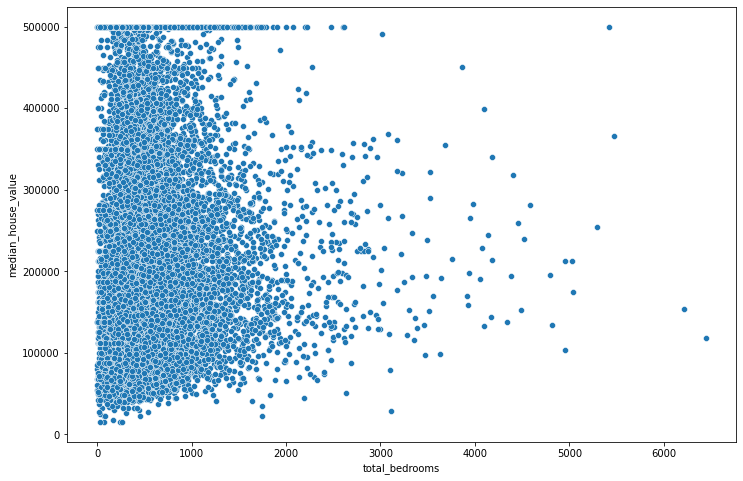

In [307]:
# Plot a scatter graph to find the correlation between total_bedrooms and median_house_value

fig, ax = plt.subplots(figsize=(12, 8))
sn.scatterplot(x=data['total_bedrooms'], y=data['median_house_value'], legend='auto')

Both scatter plots above shows that `total_rooms` and `total_bedrooms` have perfect collinearity with `median_house_value`?

How can this be corrected?



On review of our earlier correlation heat map, `total_rooms` have a higher collinearity (0.13) to `median_house_value` (which we intend to predict) than `total_bedrooms` (0.05).

Based on this evidence, the total_bedrooms column will be dropped from our dataset.

In [308]:
# Drop the total_bedrooms column

data.drop(['total_bedrooms'], axis=1, inplace=True)

In [309]:
# Check new columns
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [310]:
# Check further correlation for some other highly correlated X variables
data.corr()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.857281,0.918992,0.197882,0.133294
population,0.100270,-0.108997,-0.295787,0.857281,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,-0.025300,0.064894,0.688355,1.000000



Remember those values capped at the maxium `median_house_value` in the graph above? They might be probematic to our model hence we have to treat them.

We don't have to drop all of them, we just dropped the most disturbing capped values. It turns out to be the maximum value of `median_house_value` which is 500001.0. (Confirmation can be made the `.describe()` function.)

In [311]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,35682.000000,6082.000000,15.000100,500001.000000


In [312]:
# Using the location attribute of Pandas, I try to count how many index have median_house_value at 500001
data.loc[data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [313]:
# Drop the indices of these columns
data = data.drop(data.loc[data['median_house_value'] == 500001].index)
data.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [314]:
data.shape

(19475, 9)

## One-Hot Encode Categorical Features

In [315]:
# Checking for the unqiue values in the data once again
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [316]:
# Call the get_dummies function on the categorical feature to encode it

data = pd.get_dummies(data, columns=['ocean_proximity'])

In [317]:
data.shape

(19475, 13)

In [318]:
# Checking the first 5 rows to confirm the one-hot encoded features
data.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


# Creating our model

In [319]:
# Assign the X variable all the input features by dropping the output feature which is a column (axis=1)
# Create the y target variable using the 'median_house_value' column

X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [320]:
# The new input/explanatory variables (predictors)
X.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,0,0,0,1,0


In [321]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [322]:
# Print shapes of training and testing sets
x_train.shape

(14606, 12)

In [323]:
x_test.shape

(4869, 12)

In [324]:
# Print shapes of target variables
y_train.shape

(14606,)

In [325]:
y_test.shape

(4869,)

### Training the linear model for price prediction

In [326]:
# Import LinerRegressio estimator from scikit-learn library like we have always done in class

# Instantiate the model and set the `normalize` hyperparameter to True to normalize the data and improve the performance of our model
# Set `fit_intercept` hyperparameter to False so that the model can account for any other multicollinearity you may have missed, since you also one-hot encoded.

# Fit your model on the training features (x_train) and training label (y_train)


In [327]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [328]:
# Our training score in percentage, rounded of to 3 decimal places
linear_model.score(x_train, y_train)
print(f'Our linear model scores {(linear_model.score(x_train, y_train).round(3)) * 100}%')

Our linear model scores 60.6%


In [329]:
# Storing your training features in the predictor variable

predictors = x_train.columns

predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [330]:
# Printing the coefficeints of each predictors to understand which one plays the most role in determining the price of a house

coef = pd.Series(linear_model.coef_, predictors).sort_values()
coef

ocean_proximity_INLAND       -1.937124e+06
ocean_proximity_NEAR BAY     -1.900957e+06
ocean_proximity_<1H OCEAN    -1.895396e+06
ocean_proximity_NEAR OCEAN   -1.890399e+06
ocean_proximity_ISLAND       -1.717532e+06
longitude                    -2.234234e+04
latitude                     -2.068239e+04
population                   -3.266796e+01
total_rooms                  -1.809881e+00
households                    1.201437e+02
housing_median_age            9.196342e+02
median_income                 3.624562e+04
dtype: float64

## Interpretation of my model

In my view, the model is not biased because the income of an individual is used to judge how much a house should be worth for such person. Our linear model only just confirmed what was clearly visible in our earlier correlation heatmap.

## Make Predictions!

In [331]:
# Make predictions (.predict()) with your new model on the x_test and store it in a new variable.
y_pred = linear_model.predict(x_test)
y_pred

array([131572.56174666, 272554.49666254,  95924.9545086 , ...,
       182762.32758705, 233641.60577968, 213876.97086833])

In [332]:
# Compare predicted vs actual using code we used in our class notebook and store it in a new varible
pred_vs_actual = pd.DataFrame({'pred': y_pred, 'actual': y_test})

# Print the first 10 rows of the data
pred_vs_actual.head(10)

,pred,actual
9102,131572.561747,135800.0
11508,272554.496663,390500.0
13502,95924.954509,73400.0
20303,266512.542411,167400.0
3785,228860.991480,319400.0
17076,141145.255254,270000.0
3637,225672.885309,183100.0
8022,246041.404281,216000.0
14214,175213.253726,113500.0
9824,206292.497347,258300.0


In [333]:
# Import the r2_score metric from sklearn
# Print the testing score for your model in % and round it up to 2 decimal places

In [334]:
from sklearn.metrics import r2_score

In [335]:
print(f'Testing score for linear_model is {(r2_score(y_test, y_pred)*100).round(2)}%')

Testing score for linear_model is 61.69%


## Visualizing the difference between the Predicted House Values and the Actual House Value


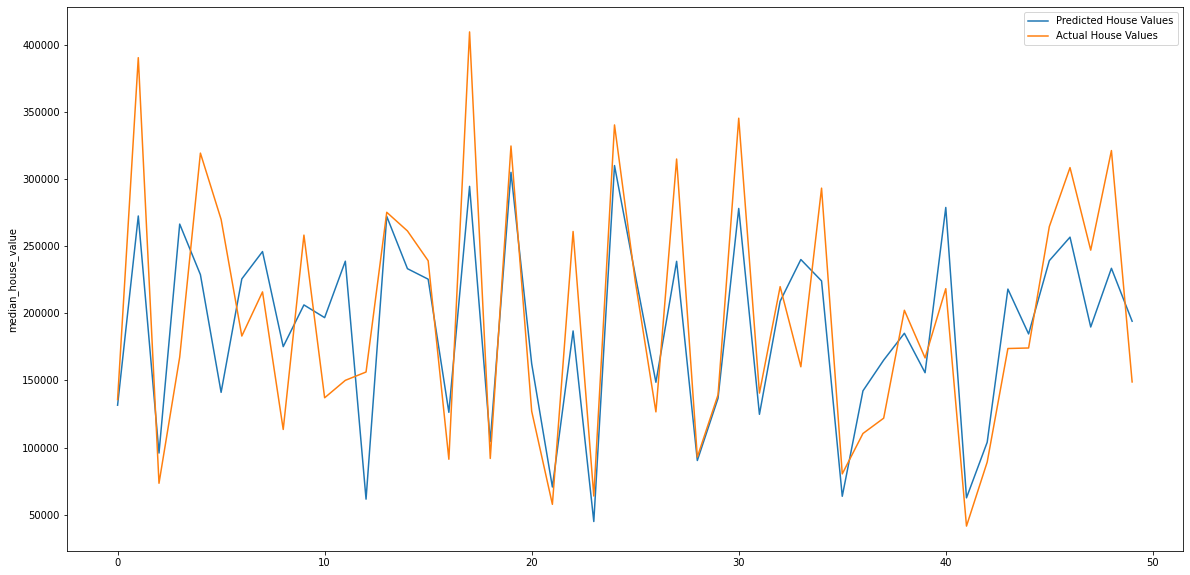

In [336]:
## Solution to the the cell above

plt.figure(figsize = (20,10))

plt.plot(y_pred[:50], label='Predicted House Values')
plt.plot(y_test.values[:50], label='Actual House Values')

plt.ylabel('median_house_value')

plt.legend()
plt.show()

# The End. 